In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression 
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)


X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

kf = KFold (n_splits=6, shuffle=True, random_state=42)
model_reg = LinearRegression()

cv_results = cross_val_score(model_reg, X, y, cv=kf)

kf = KFold(n_splits=6, shuffle=True, random_state=42)
KFold: Veriyi 6 eşit parçaya bölen bir çapraz doğrulama stratejisidir. Bu, her seferinde modelin eğitim ve test setlerini değiştirmek için kullanılır. shuffle=True parametresi, verilerin her seferinde karıştırılmasını sağlar. random_state=42 ise sonuçların tekrar edebilir olmasını garanti eder.

In [10]:
cv_results

# 6 farklı model için başarı oranlarını verdi

array([0.31239631, 0.39992274, 0.38698031, 0.19731639, 0.32317527,
       0.3320924 ])

In [14]:
import numpy as np
(np.mean(cv_results), np.std(cv_results))

(0.3253139040292499, 0.06579003824551598)

In [18]:
np.quantile(cv_results, [0.25, 0.975])
'''
0.25: Verilerin %25'lik kısmının alt sınırını, yani ilk çeyrek (Q1) dilimini verir. Bu, verilerin en küçük %25'inin bulunduğu değeri gösterir.
0.975: Verilerin %97.5'lik kısmının alt sınırını, yani yüzdelik 97.5 (Q97.5) dilimini verir. Bu, verilerin %97.5'inin altında kalan değeri gösterir.
'''

array([0.31509105, 0.39830494])

In [20]:
#  Alfa arttıkça performansın kötüleştiğini görüyoruz. Underfitting oluyor denir.

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

scores

'''
Bu kod, Ridge regresyonunun farklı regularization değerleri (alpha) ile eğitimini yaparak,
her bir değerin modelin başarısını nasıl etkilediğini incelemeyi amaçlamaktadır.
Sonuçlar, modelin regularization seviyesinin önemini gösterir: çok yüksek bir alpha değeri, modelin aşırı basit hale gelmesine ve underfitting yapmasına yol açabilir.
'''

[0.32825526615552414,
 0.32802407959947777,
 0.3252049078298792,
 0.2883603263780232,
 0.20299309688977685]

Alpha değeri, Ridge regresyonundaki regularization (ceza) terimini kontrol eder:
Küçük bir alpha değeri (örneğin 0.1), modelin daha az regularization yapmasına ve daha fazla öğrenmesine olanak tanır.
Büyük bir alpha değeri (örneğin 1000.0), modelin regularization yapmasını artırır, yani daha basit bir model elde edilir ve aşırı öğrenmeden (overfitting) kaçınılır. Ancak, çok büyük alpha değerleri, modelin veriye uyum sağlamakta zorlanmasına sebep olabilir ve bu da underfittinge yol açar.

In [26]:
# Alfa 20'nin üzerine çıktıkça performans önemli ölçüde düşer

from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores
'''
Bu kod, Lasso regresyonu kullanarak alpha değerlerinin model performansına etkisini test eder.
Küçük alpha değerleri modelin doğruluğunu artırırken, büyük alpha değerleri modelin performansını olumsuz etkiler ve underfitting durumuna yol açar.
'''

[0.3284857694292622,
 0.3166121180165745,
 0.17121386697851626,
 0.156847521532139,
 0.11477890284329806]

Alpha değeri arttıkça, Lasso modeli daha fazla regularization yapar ve bu da modelin karmaşıklığını azaltarak bazı özellikleri sıfıra indirir.
Alpha değeri küçük olduğunda, model daha fazla özellik kullanarak öğrenir ve daha iyi bir performans gösterme eğilimindedir.
Alpha değeri 20 ve üzerine çıktıkça, modelin doğruluğu genellikle düşer. Bu durumda underfitting olabilir, çünkü model daha fazla regularization yapar ve veri üzerindeki öğrenmesini sınırlayarak önemli özellikleri göz ardı eder.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'pregnancies'),
  Text(1, 0, 'diastolic'),
  Text(2, 0, 'triceps'),
  Text(3, 0, 'insulin'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'dpf'),
  Text(6, 0, 'age'),
  Text(7, 0, 'diabetes')])

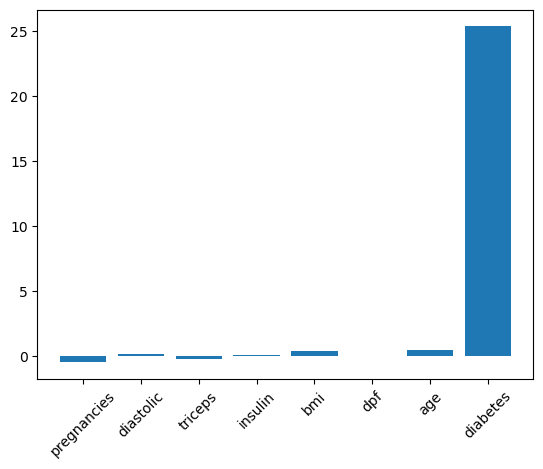

In [28]:
import matplotlib.pyplot as plt

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

names = df_diabets.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_#modelin öğrendiği katsayıları alı

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)

'''
Bu kod, Lasso regresyonunun özelliklerin önem derecelerini nasıl belirlediğini görselleştirmek için
kullanılır. Lasso'nun L1 regularization özelliği, bazı özelliklerin katsayılarını sıfıra indirerek,
önemli olanları seçer ve gereksiz olanları eleyerek daha basit bir model oluşturur.
'''

Lasso modeli alpha=0.1 ile oluşturuluyor. Burada, alpha değeri regularization parametresidir. Küçük bir alpha değeri, modelin fazla ceza (regularization) uygulamadan daha fazla özellik kullanmasına izin verir.

coef_ özelliği, eğitim sonrasında elde edilen katsayıları içerir. Bu katsayılar, her özelliğin modelin çıktısına etkisini gösterir. Lasso regresyonu, bazı katsayıları sıfıra indirerek daha basit bir model oluşturur.

plt.bar() fonksiyonu, isimler (özellikler) ile elde edilen katsayıları bir çubuk grafikte görselleştirir. Bu sayede hangi özelliklerin daha önemli olduğu, hangi özelliklerin ise modelde sıfır katsayısına sahip olduğu kolayca görülebilir.
plt.xticks(rotation=45), x-ekseni etiketlerinin 45 derece döndürülmesini sağlar, böylece etiketler daha okunabilir olur.

In [32]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)#karışıklık matrisi

array([[548,  18],
       [ 69,  32]], dtype=int64)

<Axes: >

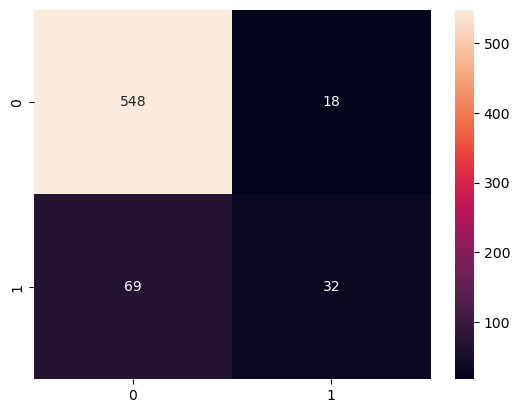

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
#bu şekilde de confusion matrixi gösterebiliriz..

'''
seaborn veri görselleştirme için kullanılan bir Python kütüphanesidir.
confusion_matrix(y_test, y_pred) ->Karışıklık matrisini veri olarak alır.
y_test: Gerçek etiketler (test veri setindeki gerçek değerler).
y_pred: Model tarafından tahmin edilen etiketler.
sns.heatmap() ->Seaborn’un ısı haritası fonksiyonudur,veri görselleştirmek için kullanılır
annot=True ->Hücrelerin içine sayısal değerleri ekler
fmt='g' ->Hücrelerde gösterilecek değerlerin formatını belirtir:
'g' (genel): Sayıları olduğu gibi gösterir (örneğin: 50, 5).
'.2f' (ondalıklı gösterim).
'''

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.64      0.32      0.42       101

    accuracy                           0.87       667
   macro avg       0.76      0.64      0.68       667
weighted avg       0.85      0.87      0.85       667



classification_report, sınıflandırma modellerinin detaylı performansını anlamak için idealdir.
Avantajı: Precision, Recall, F1-score gibi kritik metrikleri hızlıca analiz edebilmeni sağlar.
Nerede Kullanılır?
-İkili sınıflandırmada (Binary Classification)
-Çoklu sınıflandırmada (Multi-class Classification)
*Kodun Açıklaması*
Class 0
Precision = 0.89: Modelin, tahmin ettiği 0 sınıfının %88'i doğru tahmin.
Recall = 0.97: Gerçekten 0 olan verilerin %93'ü doğru tahmin.
F1-score = 0.93: Precision ve Recall'un dengeli ölçümü.
(Aynı şeyler class 1 için de geçerli)
accuracy: Tüm sınıflar için genel doğruluk oranı (%87).
macro avg: Her sınıfın ortalama Precision, Recall ve F1-score değerleri.
weighted avg: Sınıfların destek değerine (support) göre ağırlıklı ortalaması Dengesiz veri setlerinde önemlidir.

Precision (Kesinlik)?
Bir sınıfa ait tahminlerin ne kadar doğru olduğunu ölçer.
Formül: Precision= TruePositive/(TruePositive+FalsePositive)

Recall (Duyarlılık)?
Modelin bir sınıfı doğru tahmin etme oranını ölçer.
Formül: Precision= TruePositive/(TruePositive+FalsePositive)

​F1-score?
Precision ve Recall’un harmonik ortalamasıdır.
Formül=2*(Precision*Recall)/(Precision+Recall)

Support?
Her sınıf için gerçek örnek sayısını gösterir. (Yani, y_test içindeki her sınıfın frekansı.)

In [57]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_predict = model_log.predict(X_test)
'''
Bu kod, Logistic Regression kullanarak bir sınıflandırma modeli oluşturmayı ve müşteri kaybını (churn) tahmin etmeyi göstermektedir.
Model, belirli özellikler (örneğin, toplam günlük ve akşam şarj ücretleri) kullanılarak eğitilir ve test edilir.
Ayrıca, modelin performansını değerlendirmek için bir confusion matrix (karmaşıklık matrisi) ve diğer metriklerin oluşturulmasına da temel hazırlar.
'''

*Kodun Açıklaması*
X: Giriş (bağımsız) değişkenlerdir ve total_day_charge (toplam günlük ücret) ve total_eve_charge (toplam akşam ücreti) sütunlarından oluşur.
y: Çıkış (bağımlı) değişkendir ve müşteri kaybını (churn) ifade eder
1: Müşteri kaybı.
0: Müşteri kalmaya devam ediyor.
test_size=0.2: Verinin %20’sinin test seti olarak ayrıldığını belirtir.
random_state=42: Rastgele bölünmeyi sabit tutar, böylece sonuçlar her çalıştırmada aynı olur.
model_log: Bir Lojistik Regresyon modelidir.
fit(X_train, y_train): Model, eğitim verileri (özellikler ve hedef değişken) kullanılarak eğitilir.
predict(X_test): Model, test verileri üzerinde tahmin yapar.


In [59]:
y_pred_probs = model_log.predict_proba(X_test)
y_pred_probs

'''
predict_proba fonksiyonu, lojistik regresyon modeli (model_log) tarafından yapılan tahminlerin olasılık değerlerini döndürür.
Model, her test verisi örneği (X_test) için 0 ve 1 sınıflarına ait olma olasılıklarını hesaplar.
Çıktı, her veri noktası için iki olasılık içeren bir 2D numpy dizisi olur.
'''

array([[0.82892316, 0.17107684],
       [0.92986818, 0.07013182],
       [0.98204431, 0.01795569],
       ...,
       [0.91093968, 0.08906032],
       [0.92723286, 0.07276714],
       [0.9081191 , 0.0918809 ]])

In [61]:
y_pred_probs = y_pred_probs[:,1]

#İlk sütun ([:, 0]) → Sınıf 0 olasılığı (Müşteri kalıyor).
#İkinci sütun ([:, 1]) → Sınıf 1 olasılığı (Müşteri kaybediyor).
#[:, 1] ifadesi, y_pred_probs'un ikinci sütunundaki (indeks 1) değerleri alır.

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

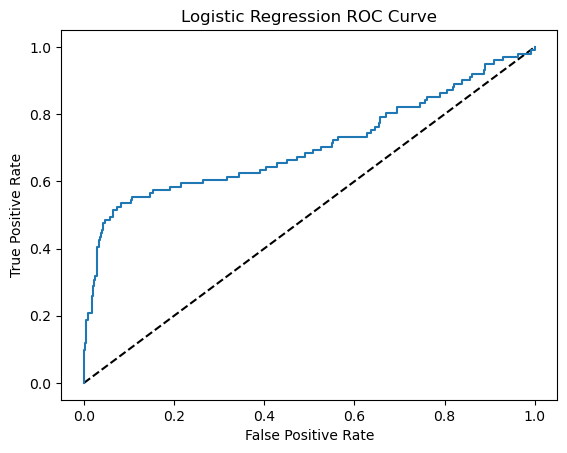

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# 96 pt

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# Bu grafiğe dayanarak modelin performansını nasıl ölçülebilir?

roc_curve, modelin sınıflandırma doğruluğunu değerlendirmek için kullanılan bir fonksiyondur. Gerçek sınıflar (y_test) ve modelin tahmin ettiği olasılıkları (y_pred_probs) kullanarak False Positive Rate (FPR) ve True Positive Rate (TPR)'yi hesaplar.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs):
y_test: Gerçek sınıf etiketleri (örneğin, müşteri kaybetme durumu).
y_pred_probs: Modelin sınıf 1 (müşteri kaybetme) olasılıkları.
Bu fonksiyon, ROC eğrisini çizmek için gereken False Positive Rate (FPR) ve True Positive Rate (TPR)'yi hesaplar. Ayrıca, ROC eğrisini çizerken kullanılacak eşik değerlerini (thresholds) döndürür.

FPR (False Positive Rate): Yanlış pozitif oranıdır. Model, sınıf 1'e ait olmayan bir örneği (yani, doğru etiket 0 olan bir örneği) sınıf 1 olarak tahmin ettiğinde ortaya çıkar.
TPR (True Positive Rate): Gerçek pozitif oranıdır. Modelin doğru şekilde sınıf 1 (müşteri kaybetme) tahmin ettiği örneklerin oranıdır.

plt.plot([0, 1], [0, 1], 'k--'):
Bu satır, rastgele tahmin yapan bir modelin ROC eğrisini çizmek için kullanılır. Yani, her iki sınıf için tahminlerin tamamen rastgele yapıldığı bir durumda ROC eğrisinin çizgisi (yani, FPR = TPR) bu çizgide olur. Bu çizgi diagonal bir çizgi olup modelin rastgele tahmin yapması durumunda elde edilecek eğridir.

ROC Eğrisi ve AUC Hesaplamaları
ROC (Receiver Operating Characteristic) Eğrisi?
ROC eğrisi, modelin doğruluğunu görsel olarak değerlendirmemize yardımcı olan bir araçtır. ROC eğrisinin yatay ekseni false positive rate (FPR), dikey ekseni ise true positive rate (TPR) yani sensitivity (duyarlılık) gösterir.Sınıflandırma modelinin doğru pozitif oranı (TPR) ile yanlış pozitif oranını (FPR) çeşitli kesme eşiği değerlerinde (threshold) nasıl değiştirdiğini gösterir.

Bu eğriyi çizmek için modelin her bir örnek için verdiği Sınıf 1 olasılıkları gerekir.
AUC (Area Under Curve)?
AUC, ROC eğrisinin altındaki alanı temsil eder ve modelin sınıflandırma başarısını özetler.
AUC değeri 0.5 ile 1.0 arasında değişir:
1.0: Mükemmel sınıflandırma.
0.5: Rastgele tahmin.
Kesme Eşiği Ayarlama
Kesme eşiği (threshold), modelin bir örneği Sınıf 0 mı yoksa Sınıf 1 mi olarak sınıflandıracağına karar vermek için kullanılan bir kriterdir. Varsayılan olarak, LogisticRegression gibi modeller 0.5 eşiğini kullanır:
Olasılık ≥ 0.5 → Sınıf 1 olarak tahmin edilir.
Olasılık < 0.5 → Sınıf 0 olarak tahmin edilir.

ROC Eğrisini Yorumlama:
Eğrinin yukarıya doğru olması: Modelin doğruluğu arttıkça ROC eğrisinin sol üst köşeye yakın olması gerekir. Bu, modelin daha doğru tahminler yaptığı anlamına gelir.
Aşağıda ve sağda yer alan eğriler: Eğri rastgele tahminler yapan bir modelin eğrisine yakınsa, bu modelin başarısız olduğunu gösterir. Yani model, gerçek sınıfları ayırt etmekte zorlanıyordur.
AUC (Area Under Curve): ROC eğrisinin altında kalan alan (AUC) da modelin genel başarısını ölçen önemli bir metriktir. AUC, 0 ile 1 arasında bir değere sahiptir:
AUC ≈ 1: Mükemmel model.
AUC ≈ 0.5: Model rastgele tahmin yapıyordur.
AUC < 0.5: Model tamamen yanlış tahminler yapıyordur.
Yüksek AUC: Modelinizin doğru sınıf tahminlerini doğru şekilde ayırt etme kabiliyetinin yüksek olduğunu gösterir.
Eğriyi Yorumlama: Eğrinin sol üst köşeye yakın olması, modelin iyi bir true positive rate (TPR) ve düşük bir false positive rate (FPR) sağladığını gösterir.


In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import numpy as np

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#KFold Cross-Validation: Veri kümesini 5 katmana böler (5 katlamalı doğrulama).
#shuffle=True parametresi, veriyi her katlama göre rastgele karıştırır, random_state=42 ise rastgeleliğin tekrarlanabilir olmasını sağlar.
param_grid = {
'alpha': np.arange(0.0001, 1, 10),
'solver':['sag', 'lsqr']
}
#Hyperparameter Grid: Modelin hiperparametreleri için arama yapılacak değerler burada tanımlanır.
#'alpha': Ridge regresyonunun regularization parametresi. np.arange(0.0001, 1, 10) ile 0.0001 ile 1 arasında 10 farklı değeri denemek için bir aralık oluşturulmuş.
#Ancak burada bir hata var çünkü np.arange böyle bir aralık oluşturmaz. Doğru olmalı: np.logspace(-4, 2, 10) gibi bir şey.
#'solver': Ridge regresyonu için çözüm yöntemleri. sag ve lsqr seçenekleri denenecek.

ridge = Ridge()#overfitting engellendi
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)#en iyi alpha ile sonuç bulur
ridge_cv.fit(X_train, y_train)
#Ridge Modeli: Ridge regresyon modeli ridge olarak tanımlanıyor.
#GridSearchCV: GridSearchCV, belirli hiperparametre değerleriyle modelin performansını k-cross-validation ile değerlendirir.
#Parametreler, param_grid ile sağlanır ve her bir hiperparametre kombinasyonu için modelin doğruluğu hesaplanır.
#Modeli Eğitme: ridge_cv.fit(X_train, y_train) komutu ile model, eğitim verileri üzerinde eğitilir. GridSearchCV, belirtilen parametreler için modelin en iyi kombinasyonunu bulur.

(ridge_cv.best_params_, ridge_cv.best_score_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'alpha': 0.0001, 'solver': 'lsqr'}, 0.34041768853017673)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

# İsteğe bağlı olarak, test edilen hiperparametre değerlerinin sayısını belirleyen n_iter bağımsız değişkenini ayarlanabilir. 
# Böylece n_iter iki olarak ayarlandığında beş katlı çapraz doğrulama 10 fit() gerçekleştirir. 


ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'solver': 'lsqr', 'alpha': 0.0001}, 0.34041768853017673)

RandomizedSearchCV: Bu, GridSearchCV'ye benzer bir hiperparametre arama yöntemidir, ancak farklı olarak parametreler rastgele seçilir ve belirli bir sayıda deneme yapılır. Yani, param_grid içindeki hiperparametre değerlerinden yalnızca rastgele bir örneklem seçilir ve bu seçilen parametreler kullanılarak model eğitilir. Bu, GridSearchCV'ye kıyasla çok daha hızlıdır, çünkü her parametre kombinasyonu yerine sadece belirli sayıda rastgele kombinasyon test edilir.
n_iter=2: Bu, rastgele seçim yapılan hiperparametre kombinasyonlarının sayısını belirtir. Burada yalnızca 2 farklı parametre kombinasyonu rastgele seçilerek denenir. Yani, param_grid içindeki her hiperparametreden sadece 2 farklı değer seçilecektir.

In [73]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')
df_music.info()

'''
df_music.info():
Bu komut, DataFrame hakkında genel bilgi verir.
Verilen CSV dosyasındaki sütunların isimlerini, veri türlerini (dtype),
null (eksik) değerlerin sayısını ve toplam satır sayısını gösterir.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       44996 non-null  int64  
 1   popularity        44996 non-null  int64  
 2   acousticness      44996 non-null  float64
 3   danceability      44996 non-null  float64
 4   duration_ms       44996 non-null  int64  
 5   energy            44996 non-null  float64
 6   instrumentalness  44996 non-null  float64
 7   liveness          44996 non-null  float64
 8   loudness          44996 non-null  float64
 9   speechiness       44996 non-null  float64
 10  tempo             44996 non-null  float64
 11  valence           44996 non-null  float64
 12  music_genre       44996 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.5+ MB


<Axes: xlabel='music_genre', ylabel='popularity'>

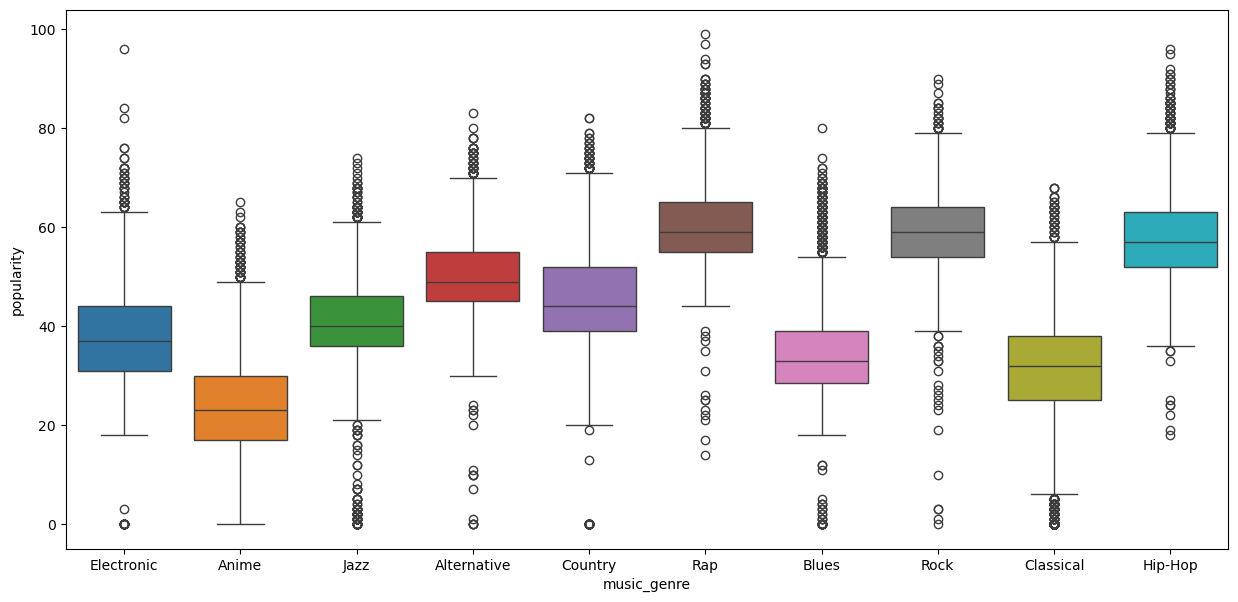

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_music, x='music_genre', y='popularity', hue='music_genre')
'''hue='music_genre': Boxplot'ta renklerin, müzik türlerine göre ayrılmasını sağlar. Yani, her müzik türü farklı renkte görselleştirilir.'''

In [77]:
#one-hot encoding 
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
music_dummies.head()

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


 drop_first=True: Bu parametre, kategorik değişkenin ilk sütununu düşürerek, multicollinearity (çoklu doğrusal bağlantı) sorununu engellemeye yardımcı olur. Yani, eğer 5 farklı müzik türü varsa, bu 5 kategoriden ilkini düşürerek sadece 4 sütun oluşturulur. Böylece modelde gereksiz çoğaltma önlenir.
 dtype='int': Oluşturulan yeni sütunların veri türünü integer (tam sayı) olarak belirler.

One-Hot Encoding'in Ne İşe Yaradığı:
music_genre sütununda çeşitli kategorik değerler (örneğin, "Pop", "Rock", "Jazz") bulunur.
One-hot encoding işlemi, her kategori için ayrı bir sütun oluşturur ve her satırda bu kategorilerden birinin varlığını 1 ile, diğerlerinin yokluğunu ise 0 ile gösterir.


In [79]:
music_dummies = pd.concat([df_music, music_dummies], axis=1)
music_dummies

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,music_genre,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,32894,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,...,Electronic,0,0,0,0,1,0,0,0,0
1,46652,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,...,Electronic,0,0,0,0,1,0,0,0,0
2,30097,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,...,Electronic,0,0,0,0,1,0,0,0,0
3,62177,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,...,Electronic,0,0,0,0,1,0,0,0,0
4,24907,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,...,Electronic,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,58878,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44992,43557,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44993,39767,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44994,57944,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,...,Hip-Hop,0,0,0,0,0,1,0,0,0


pd.concat(): Pandas kütüphanesinin veri birleştirme fonksiyonudur.
axis=1: Bu parametre, birleştirme işleminin sütunlar yönünde yapılacağını belirtir.
axis=0 Satır bazında birleştirme yapılır. 


In [81]:
music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)
music_dummies

'''Bu işlem sonucunda, music_genre ve instance_id sütunları music_dummies DataFrame'inden silinir
ve sadece geri kalan sütunlar (muhtemelen müzik türlerinin one-hot encoding sütunları) kalır.'''

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,0,0,0,0,1,0,0,0,0
1,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,0,0,0,0,1,0,0,0,0
2,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,0,0,0,0,1,0,0,0,0
3,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,0,0,0,0,1,0,0,0,0
4,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,0,0,0,0,0,1,0,0,0
44992,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,0,0,0,0,0,1,0,0,0
44993,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,0,0,0,0,0,1,0,0,0
44994,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,0,0,0,0,0,1,0,0,0


In [83]:
# Linear regression with dummy variables

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_reg = LinearRegression()
model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

np.sqrt(-model_reg_cv)

# 

array([9.55195316, 9.35056784, 9.426638  , 9.61559878, 9.60648301])

cross_val_score: Modeli çapraz doğrulama (cross-validation) ile değerlendirir. Burada, scoring='neg_mean_squared_error' parametresi kullanılarak modelin negatif ortalama kare hata (negative mean squared error) değeri hesaplanır. Modelin başarısını değerlendirmek için kullanılır. Negatif yapının nedeni, sklearn'nin hata ölçütlerini minimize etmeyi hedeflemesidir, bu nedenle daha düşük negatif MSE daha iyi bir model gösterir.

Çapraz doğrulama sonuçları negatif olarak döndüğü için, negatif MSE değerini pozitif hale getirmek amacıyla -model_reg_cv kullanılır. Ardından karekök (np.sqrt) alınarak, Root Mean Squared Error (RMSE) (Kök Ortalama Kare Hata) değeri elde edilir. RMSE, modelin tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösteren bir metriktir. Düşük RMSE, modelin daha iyi performans sergilediğini gösterir.

Sonuç:
Bu işlem sonucunda, her bir katmandaki RMSE değeri hesaplanır ve bu değer, modelin doğruluğunu ve genel performansını anlamanıza yardımcı olur.